In [1]:
from google.colab import drive

drive.mount('/content/drive')
FOLDERNAME = "Stanford Summer Session/SOC 128D"

import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sb
import plotnine as pn
import numpy as np

mplt.style.use("ggplot")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Download the “class_activities.csv” file from Canvas. Using igraph, create a network diagram based on who has worked with who in our class activities this quarter (you may want to use graph_from_data_frame()). Then plot the network.

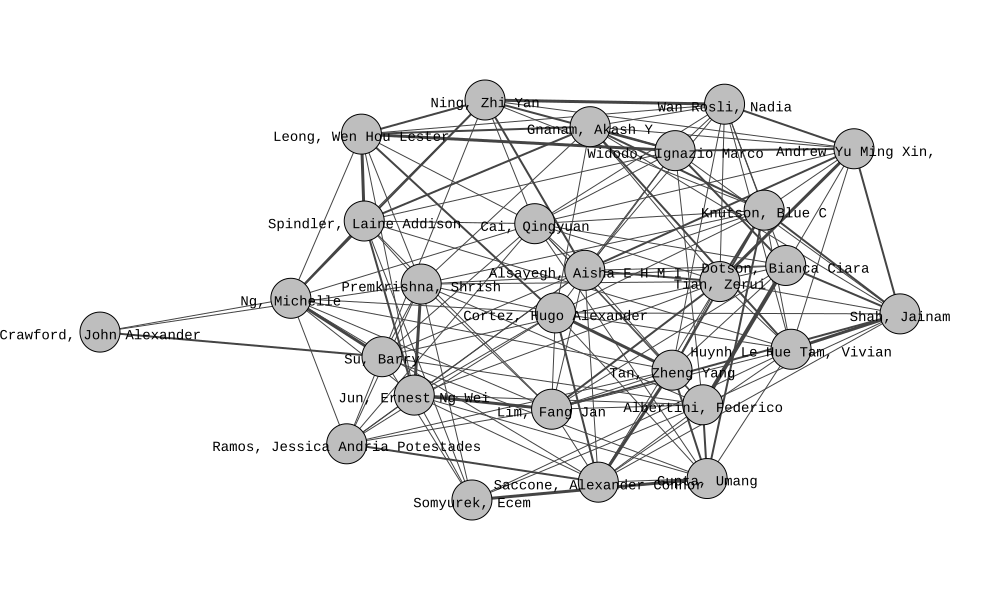

In [76]:
# !pip install igraph
# !pip install cairocffi
import random
import igraph as ig

random.seed(222)
class_df = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/class_activities.csv")
# weighted = True is same as edge_attrs=["weight"]
# Without, edge["weight"] doesn't exist. Width doesn't automatically change by weight
ig_g = ig.Graph.TupleList(class_df.itertuples(index=False), directed=False, edge_attrs=["weight"])
ig_g.vs["label"] = ig_g.vs["name"]

styles = {
  "bbox": (1000, 600),
  "margin": 100,
  "vertex_color": "grey",
  "vertex_size": 40,
  "edge_width": ig_g.es["weight"],
  "layout": "kk"
}
ig.plot(ig_g, **styles)

2. Choose a centrality measure, and explain how you would interpret this in the context of the class activities data. Who is/are the most central actor(s) according to this measure?

In [7]:
for centrality_name, centrality_list in {"Degree": ig_g.degree(), "Betweenness": ig_g.betweenness(), "Closeness": ig_g.closeness(), "Eigenvector": ig_g.eigenvector_centrality()}.items():
  most_central_val = max(centrality_list)
  most_central_person = ig_g.vs[centrality_list.index(most_central_val)]["name"]
  print(f"Most central according to {centrality_name} centrality is {most_central_person}, with a value of {most_central_val}")

Most central according to Degree centrality is Cai, Qingyuan, with a value of 16
Most central according to Betweenness centrality is Premkrishna, Shrish, with a value of 20.692521367521366
Most central according to Closeness centrality is Cai, Qingyuan, with a value of 0.7222222222222222
Most central according to Eigenvector centrality is Cai, Qingyuan, with a value of 1.0


I choose the degree centrality, but I wanted to try to analyze other measures too.

The most central actors...

According to Degree centrality: Cai, Qingyuan, with a value of 16

This means Cai, Qingyuan has grouped with the most number of different people (16).

According to Betweenness centrality: Premkrishna, Shrish, with a value of 20.692521367521366

This means Premkrishna, Shrish is most used as a bridge/connection to connect to other people, meaning people will be grouped up with him the most to group with other people.

According to Closeness centrality: Cai, Qingyuan, with a value of 0.7222222222222222

This means Cai, Qingyuan has the lowest average shortest path to others, meaning through those she has been grouped with, she can reach anyone the fastest.

According to Eigenvector centrality: Cai, Qingyuan, with a value of 1.0

This means Cai, Qingyuan is connected to many other high-degreed adjacent nodes (people who come in top few most central according to the Degree centrality as well).

3. Using the IPCC co-authorship data, create a network graph of all co-authors who share at least 2 publications together, excluding those with no network ties, similar to what we do in section 7.5. Graph the data using eigenvector scores, rather than betweenness scores, to plot the vertex sizes. Does this make a difference in our interpretation of the network? (Try comparing the top 5 most central authors, using the different measures of centrality).


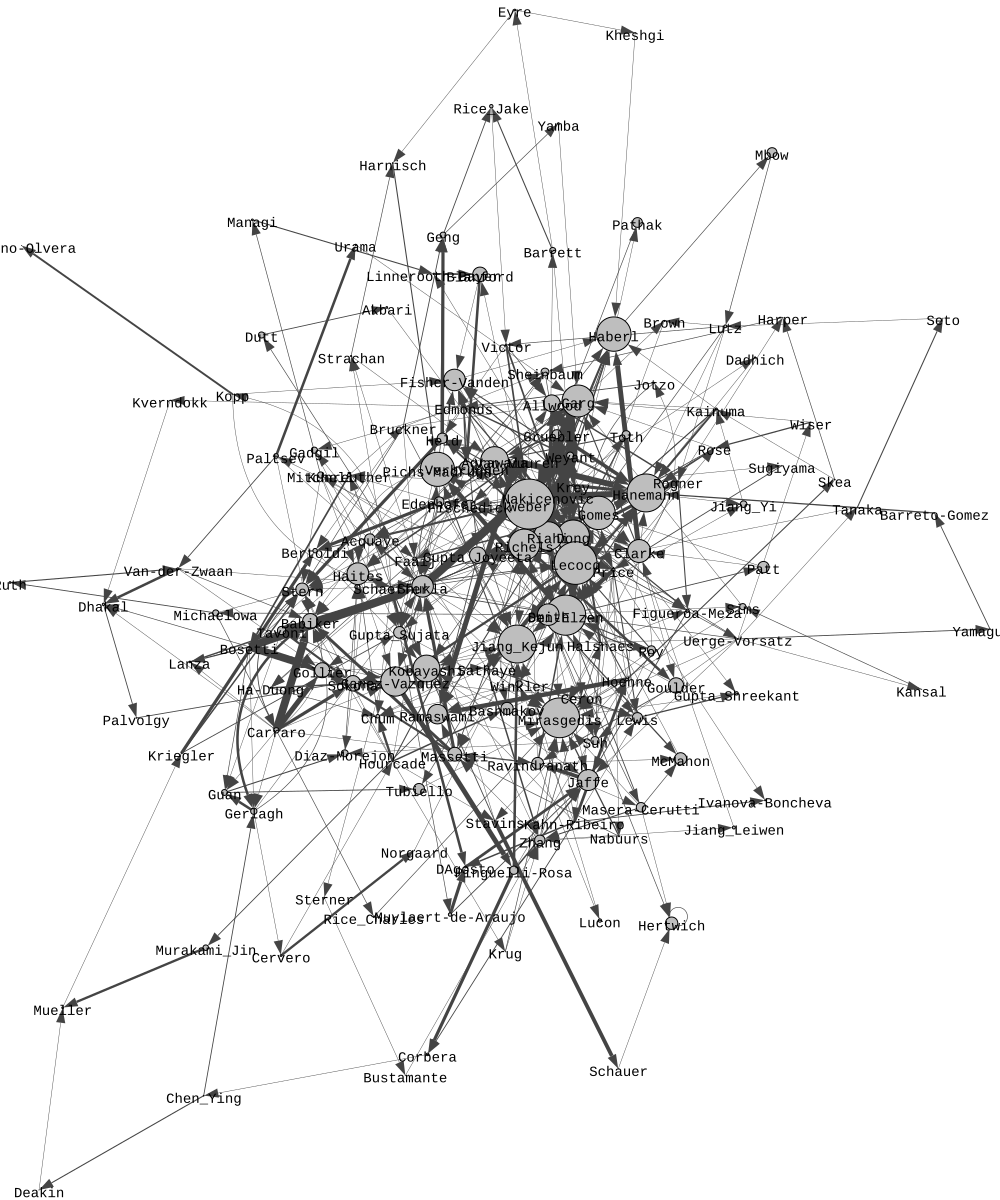

In [167]:
random.seed(222)
ipcc_authors = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/IPCC_co_authorship.csv", skiprows=1)
ipcc_authors.columns = [ipcc_authors.columns[0]] + sorted(ipcc_authors.columns[1:])
ipcc_authors.index = ipcc_authors["Author"]
# Replacing all NAs with 0
ipcc_authors = ipcc_authors.fillna(0).drop(columns=["Author"])
# Replacing all 1s with 0s
ipcc_authors = ipcc_authors.replace(1, 0)
# filtering all 0s out (no network ties)
filtered = ipcc_authors.loc[(ipcc_authors != 0).any(axis=1), (ipcc_authors != 0).any(axis=0)]
ipcc_g = ig.Graph.Weighted_Adjacency(ipcc_authors, attr='weight')
ipcc_g.vs["label"] = ipcc_g.vs["name"]

styles = {
  "bbox": (1000, 1200),
  "margin": 10,
  "vertex_size": [50*centrality/max(ipcc_g.eigenvector_centrality()) for centrality in ipcc_g.eigenvector_centrality()] ,
  "vertex_color": "grey",
  "edge_width": [10*weight/max(ipcc_g.es["weight"]) for weight in ipcc_g.es["weight"]],
  "layout": "fr"
}
ig.plot(ipcc_g, **styles)

In [201]:
for centrality_name, centrality_list in {"Betweenness": ipcc_g.betweenness(), "Eigenvector": ipcc_g.eigenvector_centrality()}.items():
  print(f"Top 5 most central according to {centrality_name} centrality is\n")
  top_5_central_vals = sorted(centrality_list, reverse=True)[:5]
  top_5_central_ppl = [ipcc_g.vs[centrality_list.index(central_val)]["name"] for central_val in top_5_central_vals]
  for i, (person, val) in enumerate(zip(top_5_central_ppl, top_5_central_vals)):
    print(f"{i+1}. {person}, with a value of {val}")
  print("\n")

Top 5 most central according to Betweenness centrality is

1. Smith, with a value of 4720.99315443011
2. Shukla, with a value of 3955.7832650441346
3. Hanemann, with a value of 3575.643978605935
4. Gomes, with a value of 3468.480478700044
5. Den-Elzen, with a value of 3462.857462827029


Top 5 most central according to Eigenvector centrality is

1. Weber, with a value of 1.0
2. Lecocq, with a value of 0.8534881013295333
3. Den-Elzen, with a value of 0.8027288290931435
4. Mirasgedis, with a value of 0.7951519998123817
5. Hanemann, with a value of 0.7582565497447115




Yes, there is a difference in interpretation as now different people are most central.

For example, Smith was previously most central as he was used as a bridge/connection to author with other people, meaning people would have authored with him the most while/before authoring with other people.

However, now Weber is the most central as he has authored with people who author with a lot of other people, some more so than himself.

4. Let’s say you want to give one of the IPCC authors a memo to disseminate to the others. Who would you choose? Which measure of centrality would help you arrive at your answer?



In [184]:
for centrality_name, centrality_list in {"Closeness": ipcc_g.closeness()}.items():
  most_central_val = max(centrality_list)
  most_central_person = ipcc_g.vs[centrality_list.index(most_central_val)]["name"]
  print(f"Most central according to {centrality_name} centrality is {most_central_person}, with a value of {most_central_val}")

Most central according to Closeness centrality is Shukla, with a value of 0.4803921568627451


I would use the Closeness centrality measure, and choose Shukla, as she has the lowest avgerate shortest path to reach all other authors, thus the memo will be disseminated in the shortest possible time

5. Finally, plot the IPCC co-authorship data, but change the color/shape of the vertices so that these correspond to authors’ gender. Describe what you see. (Note that you will need the IPCC_cv.csv dataset, which is on Canvas, to get author gender. You don’t need to remove non-collaborators from the IPCC_cv data, this has already been done).

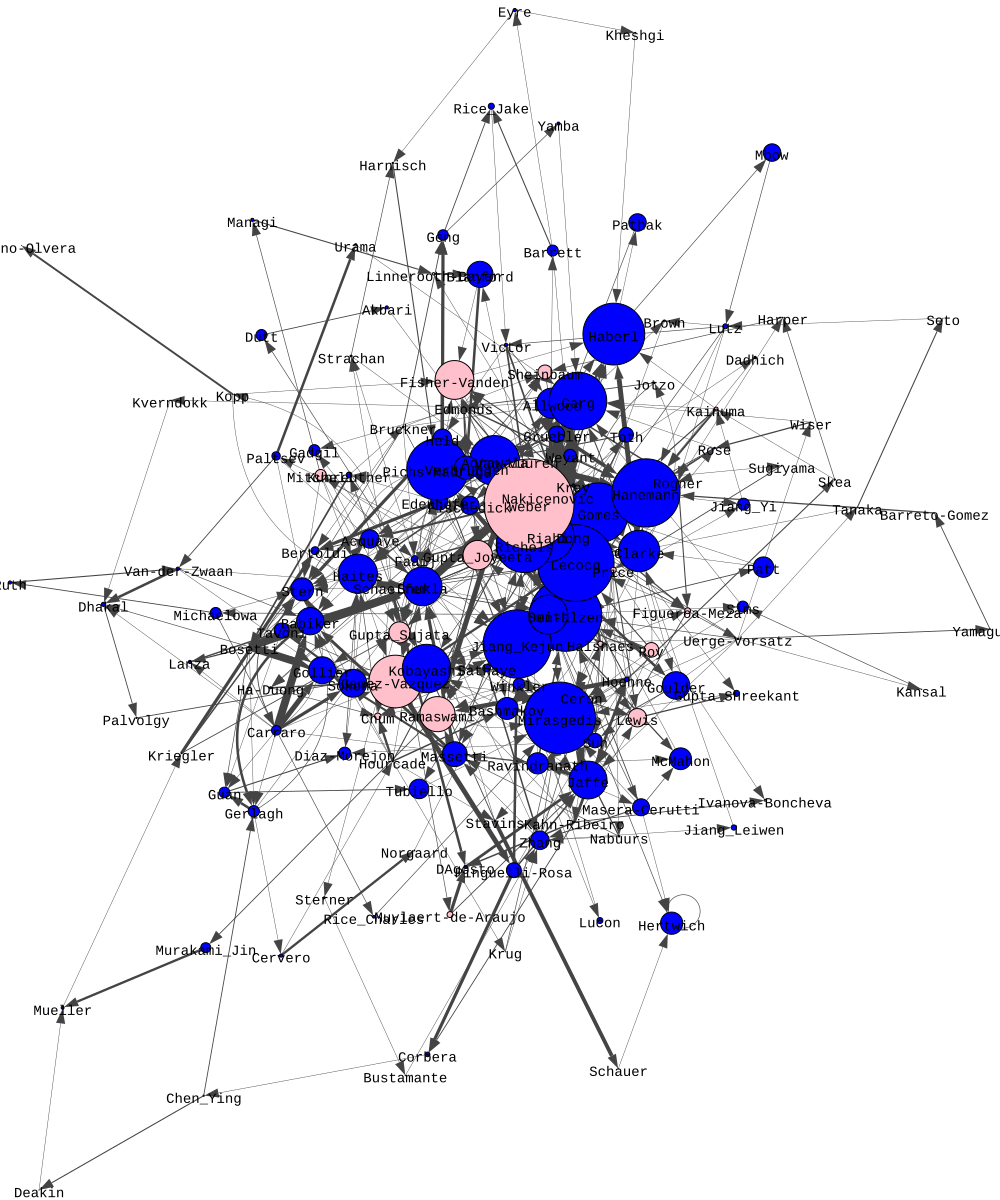

In [220]:
random.seed(222)
ipcc_cv = pd.read_csv(f"drive/My Drive/{FOLDERNAME}/data/IPCC_cv.csv")
# 1 = Male, 0 = Female
ipcc_cv["Surname"] = sorted(ipcc_cv["Surname"])
ipcc_cv["Gender_color"] = ipcc_cv["Gender"].apply(lambda x: "blue" if x == 1 else "pink")

styles = {
  "bbox": (1000, 1200),
  "margin": 10,
  "vertex_size": [90*centrality/max(ipcc_g.eigenvector_centrality()) for centrality in ipcc_g.eigenvector_centrality()] ,
  "vertex_color": ipcc_cv["Gender_color"].tolist(),
  "edge_width": [10*weight/max(ipcc_g.es["weight"]) for weight in ipcc_g.es["weight"]],
  "layout": "fr"
}
ig.plot(ipcc_g, **styles)

In [223]:
100 * ipcc_cv[ipcc_cv["Gender_color"] == "blue"].shape[0]/ipcc_cv.shape[0]

79.72972972972973

As depicted, an overwhelming majority (actually 79.7%) of the authors seem to be males! Perhaps there is indeed a bias in gender and region.

In [2]:
%cd drive/My\ Drive
%cd $FOLDERNAME
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!pip install PyPDF2

!sudo apt-get install inkscape
!jupyter nbconvert --to pdf $FILENAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive/Stanford Summer Session/SOC 128D
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  aspell aspell-en dictionaries-common enchant-2 fig2dev gawk ghostscript
  glib-networking glib-networking-common glib-networking-services
  gsettings-desktop-schemas gsfonts hunspell-en-us imagemagick
  imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0 libaspell15
